### 이탈 기준 정의

In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

import warnings
warnings.filterwarnings(action='ignore')

In [32]:
cu = pd.read_csv('EDA_customer.csv')
tr = pd.read_csv('EDA_transaction.csv')
pr = pd.read_csv('EDA_product.csv')

cycle = pd.read_csv('customer_purchase_cycle.csv')

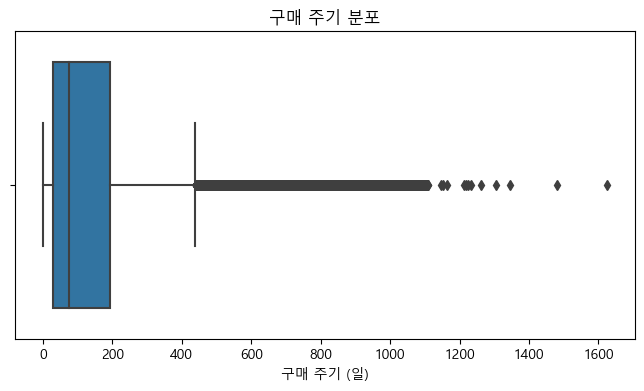

In [33]:
plt.figure(figsize=(8, 4))
sns.boxplot(data=cycle, x='median_purchase_cycle')

plt.rcParams['font.family'] = 'Malgun Gothic'
plt.xlabel('구매 주기 (일)')
plt.title('구매 주기 분포')
plt.show()

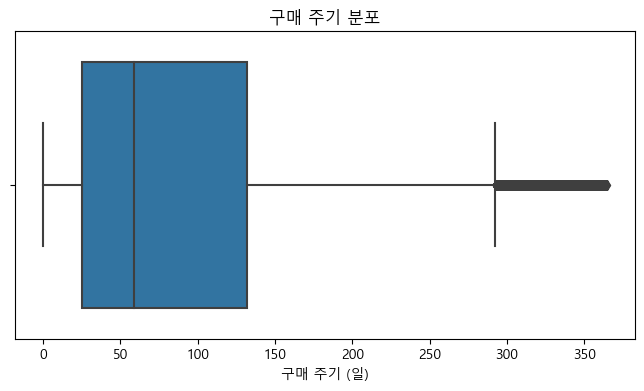

In [34]:
cycle2 = cycle.query('median_purchase_cycle < 365')

plt.figure(figsize=(8, 4))
sns.boxplot(data=cycle2, x='median_purchase_cycle')

plt.xlabel('구매 주기 (일)')
plt.title('구매 주기 분포')
plt.show()

In [35]:
# 이탈 기준 : 고객의 75%를 포함하는 120일로 결정

### 이탈률

In [36]:
tr = tr.query('payment_status == "Success"')
tr['price'] = tr['item_price'] * tr['quantity']
tr = tr.drop(['session_id', 'payment_status', 'shipment_fee', 'shipment_date_limit', 'total_amount', 'quantity', 'item_price', 'shipment_time', 'distance(km)'], axis=1).reset_index(drop=True)
tr.head()

,created_at,customer_id,payment_method,promo_amount,promo_code,product_id,year,buy_age,price
0,2018-07-29 15:22:01.458193+00:00,5868,Debit Card,1415,WEEKENDSERU,44660.0,2018,17,191247
1,2018-07-30 12:40:22.365620+00:00,4774,Credit Card,0,Not Promoted,16193.0,2018,22,145526
2,2018-09-15 11:51:17.365620+00:00,4774,OVO,0,Not Promoted,53686.0,2018,22,540696
3,2018-11-01 11:23:48.365620+00:00,4774,Credit Card,0,Not Promoted,20228.0,2018,22,271012
4,2018-12-18 11:20:30.365620+00:00,4774,Credit Card,0,Not Promoted,55220.0,2018,22,198753


In [37]:
# 2016-06-30 데이터 삭제 (6월 데이터는 한 개 존재 → 이상치로 간주)
tr = tr[tr['created_at'] != "2016-06-30 23:18:44.792905+00:00"]
df = tr.sort_values(by='created_at')
df

,created_at,customer_id,payment_method,promo_amount,promo_code,product_id,year,buy_age,price
1150270,2016-07-01 02:53:26.720195+00:00,6183,OVO,6053,XX2022,16059.0,2016,20,163539
1150271,2016-07-01 02:53:26.720195+00:00,6183,OVO,6053,XX2022,7588.0,2016,20,411340
1150382,2016-07-01 09:45:51.803842+00:00,16228,Debit Card,0,Not Promoted,47650.0,2016,20,318792
1200914,2016-07-01 22:32:45.218400+00:00,73773,Debit Card,0,Not Promoted,32185.0,2016,25,246670
1175108,2016-07-02 05:28:40.302335+00:00,37770,Credit Card,0,Not Promoted,53010.0,2016,26,533010
...,...,...,...,...,...,...,...,...,...
943135,2022-07-31 23:58:50.469277+00:00,81975,Debit Card,0,Not Promoted,29275.0,2022,19,276340
943133,2022-07-31 23:58:50.469277+00:00,81975,Debit Card,0,Not Promoted,50710.0,2022,19,100566
943076,2022-07-31 23:58:53.821469+00:00,19551,Credit Card,5800,WEEKENDSERU,17773.0,2022,31,140642
943269,2022-07-31 23:59:03.408424+00:00,22285,LinkAja,0,Not Promoted,27404.0,2022,24,150339


In [38]:
df['transaction_date'] = pd.to_datetime(df['created_at']).dt.strftime('%Y-%m-%d')
df

,created_at,customer_id,payment_method,promo_amount,promo_code,product_id,year,buy_age,price,transaction_date
1150270,2016-07-01 02:53:26.720195+00:00,6183,OVO,6053,XX2022,16059.0,2016,20,163539,2016-07-01
1150271,2016-07-01 02:53:26.720195+00:00,6183,OVO,6053,XX2022,7588.0,2016,20,411340,2016-07-01
1150382,2016-07-01 09:45:51.803842+00:00,16228,Debit Card,0,Not Promoted,47650.0,2016,20,318792,2016-07-01
1200914,2016-07-01 22:32:45.218400+00:00,73773,Debit Card,0,Not Promoted,32185.0,2016,25,246670,2016-07-01
1175108,2016-07-02 05:28:40.302335+00:00,37770,Credit Card,0,Not Promoted,53010.0,2016,26,533010,2016-07-02
...,...,...,...,...,...,...,...,...,...,...
943135,2022-07-31 23:58:50.469277+00:00,81975,Debit Card,0,Not Promoted,29275.0,2022,19,276340,2022-07-31
943133,2022-07-31 23:58:50.469277+00:00,81975,Debit Card,0,Not Promoted,50710.0,2022,19,100566,2022-07-31
943076,2022-07-31 23:58:53.821469+00:00,19551,Credit Card,5800,WEEKENDSERU,17773.0,2022,31,140642,2022-07-31
943269,2022-07-31 23:59:03.408424+00:00,22285,LinkAja,0,Not Promoted,27404.0,2022,24,150339,2022-07-31


In [39]:
start_date = datetime(2016, 7, 1)
end_date = datetime(2021, 12, 1)
date_range = [start_date + pd.DateOffset(months=i) for i in range((end_date.year - start_date.year) * 12 + end_date.month - start_date.month + 1)]
date_list1 = [pd.Timestamp(date) for date in date_range]

start_date = datetime(2016, 11, 1)
end_date = datetime(2022, 4, 1)
date_range = [start_date + pd.DateOffset(months=i) for i in range((end_date.year - start_date.year) * 12 + end_date.month - start_date.month + 1)]
date_list2 = [pd.Timestamp(date) for date in date_range]

start_date = datetime(2017, 3, 1)
end_date = datetime(2022, 8, 1)
date_range = [start_date + pd.DateOffset(months=i) for i in range((end_date.year - start_date.year) * 12 + end_date.month - start_date.month + 1)]
date_list3 = [pd.Timestamp(date) for date in date_range]

start_date = pd.Timestamp('2017-02-01')
end_date = pd.Timestamp('2022-07-01')
date_list4 = [pd.Period(year=start_date.year, month=start_date.month + i, freq='M') for i in range((end_date.year - start_date.year) * 12 + end_date.month - start_date.month + 1)]
date_list4 = [str(period) for period in date_list4]

print(date_list1) # 가입일
print(date_list2) # 거래 측정 시작
print(date_list3) # 거래 측정 끝
print(date_list4) # 이탈률 측정 (그래프에 표시)

print(len(date_list3))
print(len(date_list4))

[Timestamp('2016-07-01 00:00:00'), Timestamp('2016-08-01 00:00:00'), Timestamp('2016-09-01 00:00:00'), Timestamp('2016-10-01 00:00:00'), Timestamp('2016-11-01 00:00:00'), Timestamp('2016-12-01 00:00:00'), Timestamp('2017-01-01 00:00:00'), Timestamp('2017-02-01 00:00:00'), Timestamp('2017-03-01 00:00:00'), Timestamp('2017-04-01 00:00:00'), Timestamp('2017-05-01 00:00:00'), Timestamp('2017-06-01 00:00:00'), Timestamp('2017-07-01 00:00:00'), Timestamp('2017-08-01 00:00:00'), Timestamp('2017-09-01 00:00:00'), Timestamp('2017-10-01 00:00:00'), Timestamp('2017-11-01 00:00:00'), Timestamp('2017-12-01 00:00:00'), Timestamp('2018-01-01 00:00:00'), Timestamp('2018-02-01 00:00:00'), Timestamp('2018-03-01 00:00:00'), Timestamp('2018-04-01 00:00:00'), Timestamp('2018-05-01 00:00:00'), Timestamp('2018-06-01 00:00:00'), Timestamp('2018-07-01 00:00:00'), Timestamp('2018-08-01 00:00:00'), Timestamp('2018-09-01 00:00:00'), Timestamp('2018-10-01 00:00:00'), Timestamp('2018-11-01 00:00:00'), Timestamp('20

In [40]:
# 이탈률
cu['first_join_date'] = pd.to_datetime(cu['first_join_date'])

monthly_churn_rate = []  # 총 이탈률
monthly_churn_count = []  # 월별 이탈고객 수

churn_dict = {}

for i in range(len(date_list1)):
    total_customer = set(cu.query(f'first_join_date < "{date_list1[i]}"')['customer_id'])  # 전제 조건 (가입 후 2개월 이상된 회원)

    data = df.query(f'"{date_list2[i]}" <= transaction_date < "{date_list3[i]}"')
    active_customer = set(data['customer_id'])

    churn = set(total_customer) - set(active_customer)
    
    churn_rate = len(churn) / len(set(total_customer))
    monthly_churn_rate.append(churn_rate * 100)
    monthly_churn_count.append(len(churn))

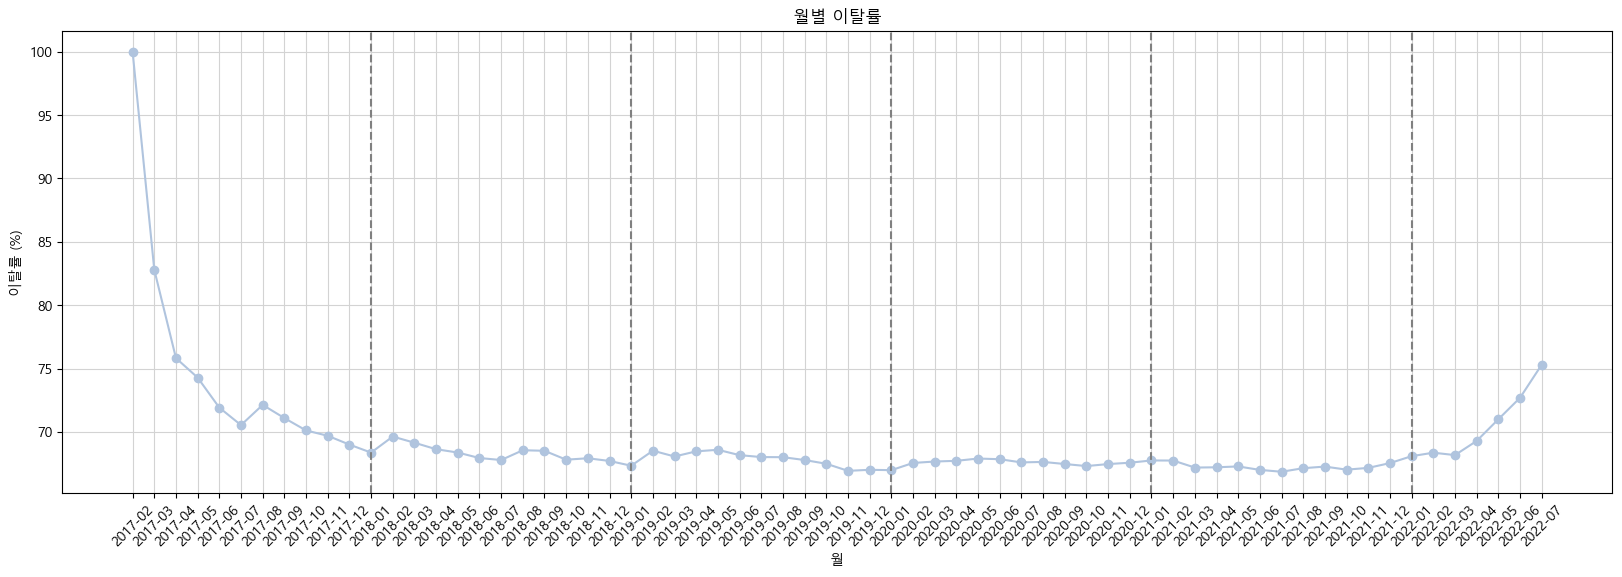

In [41]:
# 총 이탈률 그래프 시각화
fig, ax = plt.subplots(figsize=(20, 6))
ax.plot(date_list4, monthly_churn_rate, color='lightsteelblue', marker='o')

# 각 연도의 시작일에 세로선 그리기
for year_start in ['2018-01', '2019-01', '2020-01', '2021-01', '2022-01']:
    ax.axvline(x=year_start, color='gray', linestyle='--')

plt.xlabel('월')
plt.ylabel('이탈률 (%)')
plt.title('월별 이탈률')
plt.grid(True, color='lightgray')
plt.xticks(date_list4, rotation=45)
plt.show()

In [42]:
# 2022년 5월을 기점으로 이탈률이 상승하는 추세임

# >> 이탈 예측 모델을 만들어 고객별 맞춤 프로모션 진행
# >> 이탈률에 영향을 미치는 요인을 파악하여 이탈률 개선을 위한 해결 방안 모색